In [2]:
import pandas as pd
s_train = pd.read_csv("./BTC_USD.csv", index_col="Date", parse_dates=True, squeeze=True)

/var/folders/vq/lr9jr0w132n5fxzlgyfxgg3h0000gn/T/ipykernel_58552/1907568209.py:2: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  s_train = pd.read_csv("./BTC_USD.csv", index_col="Date", parse_dates=True, squeeze=True)


In [4]:
from adtk.data import validate_series
s_train = validate_series(s_train)
print(s_train)

Date
2020-06-17     9473.3
2020-06-18     9400.0
2020-06-19     9315.5
2020-06-20     9371.3
2020-06-21     9298.1
               ...   
2022-09-16    19809.9
2022-09-17    20127.0
2022-09-18    19424.0
2022-09-19    19544.5
2022-09-20    19261.0
Freq: D, Name: Price, Length: 826, dtype: float64


[<AxesSubplot:>]

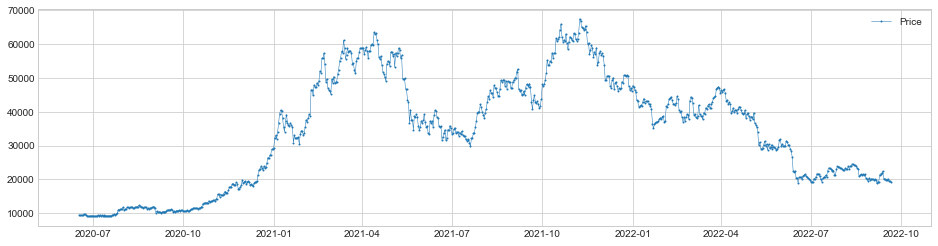

In [5]:
from adtk.visualization import plot
plot(s_train)

In [6]:
from adtk.detector import SeasonalAD
seasonal_ad = SeasonalAD()
anomalies = seasonal_ad.fit_detect(s_train)
plot(s_train, anomaly=anomalies, anomaly_color="red", anomaly_tag="marker")

Exception: Could not find significant seasonality.

In [7]:
s_test = pd.read_csv("./BTC_USD.csv", index_col="Date", parse_dates=True, squeeze=True)
s_test = validate_series(s_test)
print(s_test)

Date
2020-06-17     9473.3
2020-06-18     9400.0
2020-06-19     9315.5
2020-06-20     9371.3
2020-06-21     9298.1
               ...   
2022-09-16    19809.9
2022-09-17    20127.0
2022-09-18    19424.0
2022-09-19    19544.5
2022-09-20    19261.0
Freq: D, Name: Price, Length: 826, dtype: float64


/var/folders/vq/lr9jr0w132n5fxzlgyfxgg3h0000gn/T/ipykernel_58552/3109276571.py:1: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  s_test = pd.read_csv("./BTC_USD.csv", index_col="Date", parse_dates=True, squeeze=True)


In [8]:
anomalies_pred = seasonal_ad.detect(s_test)
plot(s_test, anomaly=anomalies_pred,
         ts_linewidth=1, anomaly_color='red', anomaly_tag="marker")

RuntimeError: The model must be trained first.

In [9]:
s = pd.read_csv("./BTC_USD.csv", index_col="Date", parse_dates=True, squeeze=True)
s = validate_series(s)

/var/folders/vq/lr9jr0w132n5fxzlgyfxgg3h0000gn/T/ipykernel_58552/2170339765.py:1: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  s = pd.read_csv("./BTC_USD.csv", index_col="Date", parse_dates=True, squeeze=True)


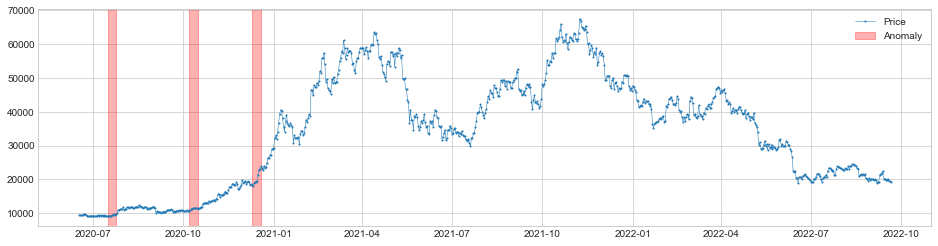

In [10]:
from adtk.detector import VolatilityShiftAD
volatility_shift_ad = VolatilityShiftAD(c=6.0, side='positive', window=30)
anomalies = volatility_shift_ad.fit_detect(s)
plot(s, anomaly=anomalies, anomaly_color='red');

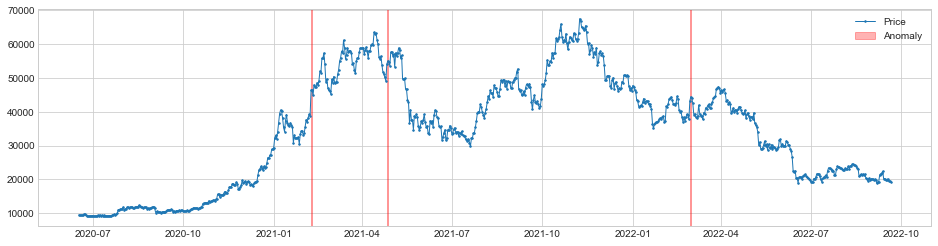

In [11]:
from adtk.detector import PersistAD
persist_ad = PersistAD(c=3.0, side='positive')
anomalies = persist_ad.fit_detect(s)
plot(s, anomaly=anomalies, ts_linewidth=1, ts_markersize=3, anomaly_color='red');